In [ ]:
import numpy as np 
import scipy.io 
import matplotlib.pyplot as plt 
from scipy.linalg import eigh




In [37]:
# 1. Simple graph: Define adjacency matrix 
AdjMatrix = np.array([[0, 1, 1, 0], 
                      [1, 0, 0, 1], 
                      [1, 0, 0, 1], 
                      [0, 1, 1, 0]]) 
print("Adjacency Matrix:") 
print(AdjMatrix)

Adjacency Matrix:
[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]


In [38]:
# 2. Find the row sums of the matrix AdjMatrix 
RowSums = np.sum(AdjMatrix, axis=1) 
print("\nRow Sums:") 
print(RowSums) 


Row Sums:
[2 2 2 2]


In [39]:
# 3. Compute the Laplacian of the graph 
LaplaceGraph = np.diag(RowSums) - AdjMatrix 
print("\nLaplacian Matrix:") 
print(LaplaceGraph) 
 
# Check if LaplaceGraph is singular 
test_vector = np.ones(len(LaplaceGraph)) 
singularity_check = LaplaceGraph @ test_vector 
print("\nSingularity Check (Laplacian * ones):") 
print(singularity_check)


Laplacian Matrix:
[[ 2 -1 -1  0]
 [-1  2  0 -1]
 [-1  0  2 -1]
 [ 0 -1 -1  2]]

Singularity Check (Laplacian * ones):
[0. 0. 0. 0.]


In [40]:
# 4. Find eigenvalues and eigenvectors using the eig function 
D, V = np.linalg.eig(LaplaceGraph)

In [41]:
# 5
d, ind = np.argsort(D), np.argsort(D) 
D = np.diag(D[ind]) 
V = V[:, ind] 
 
print("\nEigenvalues (sorted):") 
print(np.diag(D))
print("\nEigenvectors (sorted):") 
print(V)



Eigenvalues (sorted):
[-2.22044605e-16  2.00000000e+00  2.00000000e+00  4.00000000e+00]

Eigenvectors (sorted):
[[ 5.00000000e-01  4.08248290e-01  7.07106781e-01 -5.00000000e-01]
 [ 5.00000000e-01 -5.77350269e-01  4.80181756e-16  5.00000000e-01]
 [ 5.00000000e-01  5.77350269e-01 -1.77321568e-16  5.00000000e-01]
 [ 5.00000000e-01 -4.08248290e-01 -7.07106781e-01 -5.00000000e-01]]


In [42]:
# 6. Identify the second smallest eigenvalue and its corresponding eigenvector 
second_smallest_eigenvalue = D[1, 1] 
V2 = V[:, 1] 
 
# Ensure V2 has a positive first entry 
if V2[0] < 0: 
    V2 = -V2 
 
print("\nSecond Smallest Eigenvalue:") 
print(second_smallest_eigenvalue) 
print("\nEigenvector corresponding to the second smallest eigenvalue (V2):") 
print(V2)


Second Smallest Eigenvalue:
1.9999999999999991

Eigenvector corresponding to the second smallest eigenvalue (V2):
[ 0.40824829 -0.57735027  0.57735027 -0.40824829]



Positive Indices (V2 > 0):
[0, 2]

Negative Indices (V2 <= 0):
[1, 3]


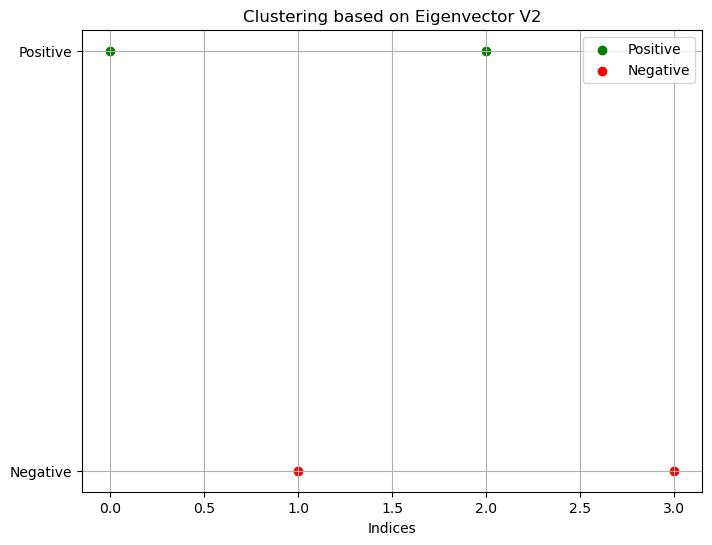

In [43]:
# 7. Separate the elements of the eigenvector V2 
pos = [] 
neg = [] 
for j in range(len(V2)): 
    if V2[j] > 0: 
        pos.append(j) 
    else: 
        neg.append(j) 
 
print("\nPositive Indices (V2 > 0):") 
print(pos) 
print("\nNegative Indices (V2 <= 0):") 
print(neg) 
 
# Optional: Visualize the clusters 
plt.figure(figsize=(8, 6)) 
plt.scatter(pos, [1]*len(pos), color='green', label='Positive') 
plt.scatter(neg, [0]*len(neg), color='red', label='Negative') 
plt.yticks([0, 1], ['Negative', 'Positive']) 
plt.title('Clustering based on Eigenvector V2') 
plt.xlabel('Indices') 
plt.legend() 
plt.grid() 
plt.show()

Loaded Social adjacency matrix with shape: (351, 351)


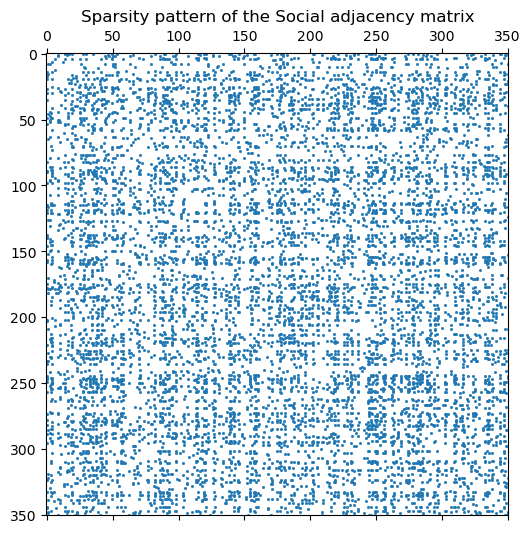

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# 8. Load the data 
data = loadmat("social.mat") 
Social = data['Social'] 
print("Loaded Social adjacency matrix with shape:", Social.shape) 

# Spy plot of the Social matrix 
plt.figure(figsize=(8, 6)) 
plt.spy(Social, markersize=1) 
plt.title('Sparsity pattern of the Social adjacency matrix') 
plt.show()


In [45]:
# 9. Define DiagSocial and LaplaceSocial 
DiagSocial = np.sum(Social, axis=1) 
LaplaceSocial = np.diag(DiagSocial) - Social 
print("\nDiagonal matrix DiagSocial:") 
print(DiagSocial) 
print("\nLaplacian matrix LaplaceSocial:") 
print(LaplaceSocial) 


Diagonal matrix DiagSocial:
[42 19 25 36 50  5  7  2 29  5 28  5  4  8 38 17 47  4 29 49 28 17  7 23
  8 43 25 48 30 20 43 47  6 39 34 46 40 50 27 32 15 46 33 31 24 42 10  8
  6 44 26  5 24 47  6 24 50  7 56 11  4  4 15 24  9 21  7 22 23  5 40 36
  8  5  9  4  4 45  4 23  5 35 46  9  8  7 56 34 49  9 48 42  6 44 33 34
 29 24 50  4  8  4 21 43 28  6 21 26  5  8 23  3 27 51 42 48 18  7 31 50
 46 45 25  4  4  7 22 52 41  4  5 24 16  8 20  3 34  4 46 46 43 27 43 32
  4 42 42  4  5  4 26  7 20  7 51 26 32 48 42 55 48  6  6  7 28  6  7  4
 29 33 19 39  4  6  6 47 32 45 45 22 30 39 19  5 27 44 30 34 43  5  5 48
 19 26 35  7 50 31  6 31  6 34 51  7  6 29 32  5  4 18 29  4  5 38 32 11
 43 24 46 54 34 48  6  5  5 18 49 14 47 22 28 46 46 22  6  7 45  5  5  6
  6 16 23  6 41 43 49 50 40 48 41 44 23 31 27 40 46 52  5  5  5 27 25 44
 47  6  4 36 16 43  8  5  7 44 55 41  3 29 50 34 39 25 44 50  8 47 19  6
 21 46 40 34 22  6 48 28 41 29 18  3  5  6 52 44  8  6  5 18  6 42 44 45
  8  6 25 33 51 20  5 

In [46]:
# 10. Compute eigenvalues and eigenvectors 
D, V = np.linalg.eig(LaplaceSocial) 
 
print("\nEigenvalues (D):") 
print(D) 
print("\nEigenvectors (V):") 
print(V) 
 
# Check the shapes 
print("Shape of V (eigenvectors):", V.shape) 
print("Shape of D (eigenvalues):", D.shape) 
d, ind = np.argsort(D), np.argsort(D) 
D = np.diag(D[ind]) 
V = V[:, ind] 
 
print("\nEigenvalues (sorted):") 
print(np.diag(D)) 
print("\nEigenvectors (sorted):") 
print(V)


Eigenvalues (D):
[ 7.83726185e+20  4.69452742e+20  3.60858037e+20  2.63133350e+20
  1.80362825e+20  1.70182927e+20  1.67965098e+20  1.65739742e+20
  1.64450621e+20 -1.96859959e+20 -1.92103673e+20  1.53891311e+20
  1.47636037e+20  1.43213235e+20 -1.78690854e+20 -1.77812416e+20
 -1.70974312e+20 -1.68924373e+20 -1.66323610e+20 -1.60434460e+20
 -1.58764568e+20 -1.48395654e+20 -1.50733606e+20 -1.54346568e+20
 -1.54664298e+20  1.40489284e+20  1.38083299e+20  1.38683216e+20
  1.34602091e+20  1.31062981e+20  1.30358148e+20  1.25564038e+20
  1.23581014e+20  1.22794790e+20  1.18005302e+20  1.16908138e+20
  1.14938035e+20 -1.45802342e+20 -1.42473976e+20 -1.41051479e+20
 -1.39759708e+20 -1.36067037e+20 -1.32989250e+20 -1.30627279e+20
 -1.29622346e+20 -1.27772261e+20 -1.26506545e+20 -1.25359620e+20
 -1.24385691e+20 -1.22476777e+20 -1.21961380e+20 -1.19310553e+20
 -1.17555657e+20 -1.16676622e+20  1.12100301e+20  1.11356675e+20
  1.10547598e+20  1.07829813e+20  1.06299208e+20  1.05052168e+20
  1.041

In [47]:
# 11
second_smallest_eigenvalue = D[1, 1] 
V2 = V[:, 1] 
 
# Ensure V2 has a positive first entry 
if V2[0] < 0: 
    V2 = -V2 
 
print("\nSecond Smallest Eigenvalue:") 
print(second_smallest_eigenvalue) 
print("\nEigenvector corresponding to the second smallest eigenvalue (V2):") 
print(V2) 
 
pos = [] 
neg = [] 
for j in range(len(V2)): 
    if V2[j] > 0: 
        pos.append(j) 
    else: 
        neg.append(j) 
 
print("\nPositive Indices (V2 > 0):") 
print(pos) 
print("\nNegative Indices (V2 <= 0):") 
print(neg)


Second Smallest Eigenvalue:
-1.9210367262365683e+20

Eigenvector corresponding to the second smallest eigenvalue (V2):
[ 2.86912150e-03  1.81178076e-03  5.50859041e-03  1.94676779e-02
 -1.28609860e-01 -9.93712863e-04  4.04850090e-03 -2.43664212e-03
  2.27856350e-04  6.24695444e-03 -8.61295843e-03  4.65089406e-03
 -9.71796814e-03 -1.49755986e-02  1.95976684e-02 -3.69606931e-02
  2.70444780e-02 -2.63507512e-03 -1.15876235e-02 -1.09542447e-01
  6.59081818e-03  9.70729699e-03  3.40228265e-03 -8.17489204e-03
  2.03402952e-02 -1.93658576e-01  2.65073994e-02 -3.40863035e-02
  6.09699580e-04  7.79758397e-03  8.93789592e-03  5.57428370e-02
 -6.87508378e-03  6.34498858e-02  3.06756112e-02 -1.23087227e-01
  8.71866326e-02 -9.60165834e-03  2.57189329e-02 -8.97965518e-03
  5.84041334e-03  2.18775298e-01 -1.31553641e-02 -3.53919789e-02
 -9.46004681e-03  2.92699243e-02  3.99098246e-03 -1.64232016e-02
 -1.89728721e-02 -1.39130382e-02 -1.41059580e-02  2.50180396e-02
  2.74526716e-03 -9.18624698e-03  2

In [48]:
# 12
# Create the order based on positive and negative indices 
order = pos + neg  # Combine the positive and negative indices 
 
m, n = Social.shape  # Get the shape of the Social matrix 
iden = np.eye(m)  # Identity matrix of size m 
 
# Create the permutation matrix P
P = np.zeros((m, m)) 
for j in range(m): 
    for k in range(m): 
        P[j, k] = iden[order[j], k] 
 
# Permute the adjacency matrix 
SocialOrdered = P @ Social @ P.T  # Using matrix multiplication 
 
print("Shape of SocialOrdered:", SocialOrdered.shape)

Shape of SocialOrdered: (351, 351)


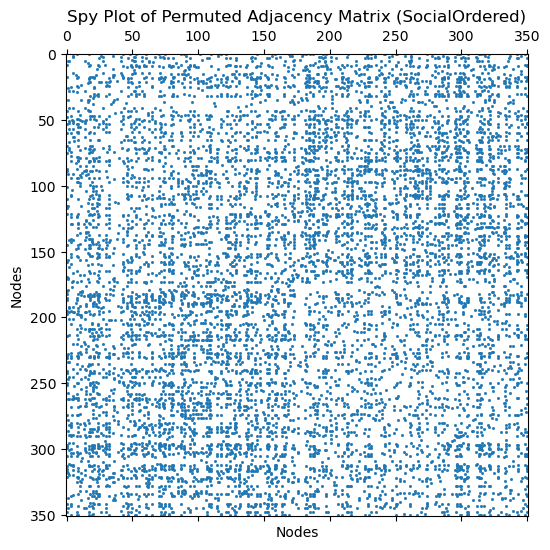

In [49]:
# Plot the permuted adjacency matrix 
plt.figure(figsize=(8, 6)) 
plt.spy(SocialOrdered, markersize=1)  # Using a smaller marker size for better visibility 
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrdered)") 
plt.xlabel("Nodes") 
plt.ylabel("Nodes") 
plt.grid(False)  # Disable the grid 
plt.show()

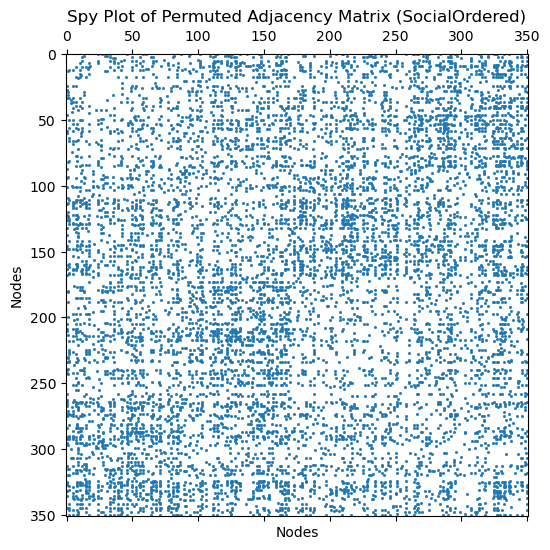

In [50]:
# 14

import numpy as n 
# Explore the third smallest eigenvalue for clustering 
V3 = V[:, 2]  # Get the third eigenvector 
if V3[0] < 0:  # Ensure V3 has a positive first entry 
    V3 = -V3 
 
# Initialize lists for the groups 
pp = []  # ++ group 
pn = []  # +- group 
np = []  # -+ group 
nn = []  # -- group 
 
# Grouping based on the signs of V2 and V3 
for j in range(len(V2)): 
    if V2[j] > 0: 
        if V3[j] > 0: 
            pp.append(j) 
        else: 
            pn.append(j) 
    else: 
        if V3[j] > 0: 
            np.append(j) 
        else: 
            nn.append(j) 
 
# Combine the orders of the groups 
order = pp + pn + np + nn 
m = len(Social)  # Get the size of Social 
iden = n.eye(m)  # Identity matrix of size m 
P = n.zeros((m, m))  # Initialize permutation matrix 
 
# Create the permutation matrix 
for j in range(m): 
    P[j, :] = iden[order[j], :] 
 
# Permute the adjacency matrix
SocialOrdered = P @ Social @ P.T 
 
# Plot the permuted adjacency matrix 
plt.figure(figsize=(8, 6)) 
plt.spy(SocialOrdered, markersize=1) 
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrdered)") 
plt.xlabel("Nodes") 
plt.ylabel("Nodes") 
plt.grid(False)  # Disable the grid 
plt.show()

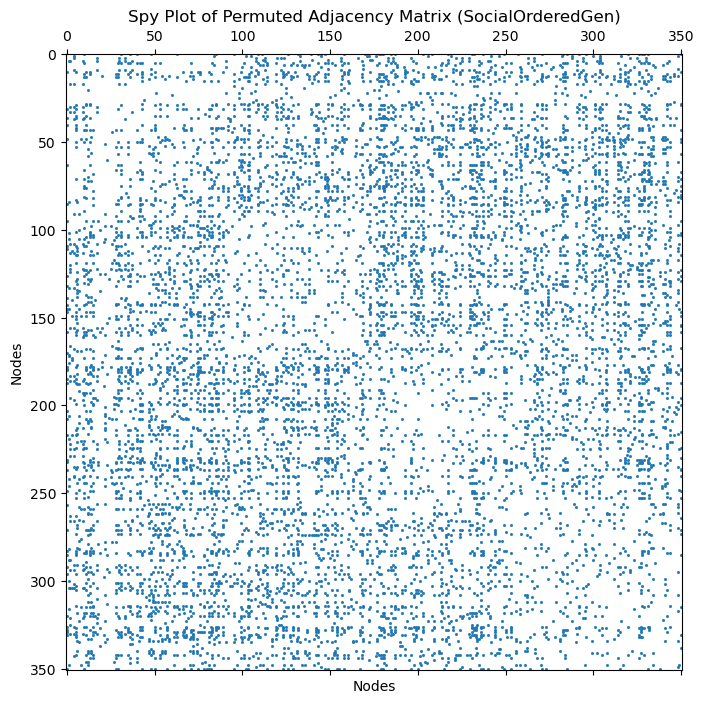

In [51]:
# Step 15: Fiedler vector procedure iteratively for clusters 
import numpy as np 
import matplotlib.pyplot as plt 
 
#  Assuming  'Social'  is  your  adjacency  matrix,  and  'pos'  and  'neg'  are  your  positive  and negative indices 
# Define SocialPos and SocialNeg based on the positive and negative indices 
SocialPos = Social[np.ix_(pos, pos)] 
SocialNeg = Social[np.ix_(neg, neg)] 
 
# Calculate the Laplacian for the positive group 
rowsumpos = np.sum(SocialPos, axis=1) 
DiagSocialPos = np.diag(rowsumpos) 
LaplaceSocialPos = DiagSocialPos - SocialPos 
 
# Eigen decomposition for positive group 
DPos , VPos = np.linalg.eig(LaplaceSocialPos) 
d, ind = np.argsort(DPos), np.argsort(DPos) 
DPos = np.diag(DPos[ind]) 
VPos = VPos[:, ind] 
V2Pos = VPos[:, 1]  # Second smallest eigenvector for positive group 
 
# Group positive nodes 
posp = []  # Positive group 
posn = []  # Negative group 
for j in range(len(V2Pos)): 
    if V2Pos[j] > 0: 
        posp.append(pos[j])  # Append original index 
    else: 
        posn.append(pos[j])  # Append original index 
 
# Calculate the Laplacian for the negative group 
rowsumneg = np.sum(SocialNeg, axis=1) 
DiagSocialNeg = np.diag(rowsumneg) 
LaplaceSocialNeg = DiagSocialNeg - SocialNeg 
 
# Eigen decomposition for negative group 
DNeg , VNeg = np.linalg.eig(LaplaceSocialNeg) 
d, ind = np.argsort(DNeg), np.argsort(DNeg) 
DNeg = np.diag(DNeg[ind]) 
VNeg = VNeg[:, ind] 
V2Neg = VNeg[:, 1]  # Second smallest eigenvector for negative group 
 
# Group negative nodes 
negp = []  # Positive group 
negn = []  # Negative group 
for j in range(len(V2Neg)): 
    if V2Neg[j] > 0: 
        negp.append(neg[j])  # Append original index 
    else: 
        negn.append(neg[j])  # Append original index 
 
# Generate the final order for the permutation 
ordergen = posp + posn + negp + negn 
 
# Create the permutation matrix 
m = len(Social)  # Assuming the size of Social 
iden = np.eye(m)  # Identity matrix of size m 
P = np.zeros((m, m))  # Initialize permutation matrix 
 
# Create the permutation matrix 
for j in range(m): 
    P[j, :] = iden[ordergen[j], :]  # Filling the permutation matrix based on ordergen 
 
# Permute the adjacency matrix 
SocialOrderedGen = P @ Social @ P.T  # Permutation of the Social matrix 
 
# Plot the permuted adjacency matrix 
plt.figure(figsize=(10, 8)) 
plt.spy(SocialOrderedGen, markersize=1) 
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrderedGen)") 
plt.xlabel("Nodes")
plt.ylabel("Nodes") 
plt.grid(False)  # Disable grid for clarity 
plt.show()